# PAC 2: Visualització de dades

**Autor:** Jonathan Mir Fernández-Aramburu

/var/folders/t6/173ypn8526x0hgv5kcctf1c40000gn/T/ipykernel_7783/2258727653.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/t6/173ypn8526x0hgv5kcctf1c40000gn/T/ipykernel_7783/2258727653.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


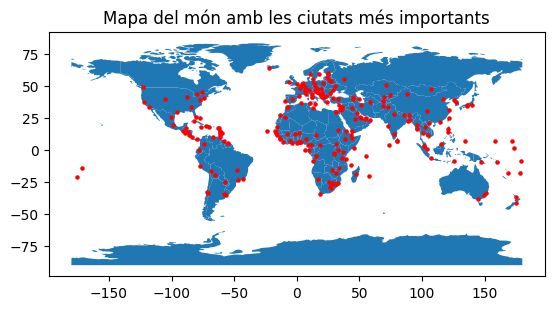

In [6]:
# Instal·la paquets
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Descarrega les dades de https://www.naturalearthdata.com/
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Mostra la gràfica
fig, ax = plt.subplots()
world.plot(ax=ax)
cities.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Mapa del món amb les ciutats més importants')
plt.show()

In [2]:
df_cities = cities
df_cities['coord_x'] = df_cities['geometry'].apply(lambda geom: geom.x)
df_cities['coord_y'] = df_cities['geometry'].apply(lambda geom: geom.y)
df_cities

,name,geometry,coord_x,coord_y
0,Vatican City,POINT (12.45339 41.90328),12.453387,41.903282
1,San Marino,POINT (12.44177 43.93610),12.441770,43.936096
2,Vaduz,POINT (9.51667 47.13372),9.516670,47.133724
3,Lobamba,POINT (31.20000 -26.46667),31.199997,-26.466667
4,Luxembourg,POINT (6.13000 49.61166),6.130003,49.611660
...,...,...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731),-43.212117,-22.907308
239,São Paulo,POINT (-46.62697 -23.55673),-46.626966,-23.556734
240,Sydney,POINT (151.21255 -33.87137),151.212548,-33.871373
241,Singapore,POINT (103.85387 1.29498),103.853875,1.294979


In [3]:
df_cities_sample = df_cities.head(30)

In [16]:
from radialtree import radialTreee
# Compute and plot the dendrogram.
city_names = list(df_cities_sample['name'])
Y = sch.linkage(df_cities_sample[['coord_x', 'coord_y']], method='single')
Z2 = sch.dendrogram(Y, labels=city_names, no_plot=True)

/var/folders/t6/173ypn8526x0hgv5kcctf1c40000gn/T/ipykernel_7783/3406592530.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


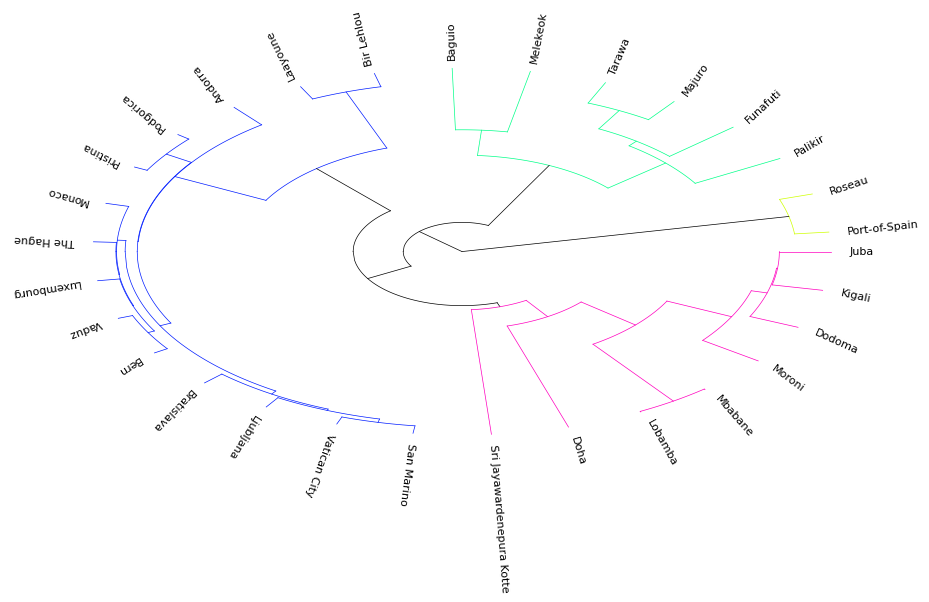

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
# plot(Z2, colorlabels=colors_dict,colorlabels_legend=colors_legends,show=True)
radialTreee(Z2, ax=ax)
fig.show()

In [19]:
# Descarregat de https://www.kaggle.com/code/ishanshrivastava28/clothes-and-accessories-sales-and-product-details
df_clothes = pd.read_csv('/Users/allianz/PycharmProjects/data_viz_uoc/Sales_Product_Details.csv')
df_clothes.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000


In [20]:
# Agrupar por 'Product_Line' y 'Raw_Material' y contar las combinaciones
combinaciones = df_clothes.groupby(['Product_Line', 'Raw_Material']).size().reset_index(name='Count')
# Mostrar el resultado
print(combinaciones)

  Product_Line Raw_Material  Count
0     Leathers      Leather      1
1        Shoes      Leather      1
2         Tops     Cashmere      4
3         Tops       Cotton     11
4         Tops      Fabrics      1
5         Tops      Leather      1
6         Tops    Polyester      2
7         Tops         Wool      4
8     Trousers       Cotton      4
9     Trousers      Leather      1


In [21]:
df_clothes.Product_Line.value_counts()

Product_Line
Tops        23
Trousers     5
Leathers     1
Shoes        1
Name: count, dtype: int64

In [22]:
df_clothes.Raw_Material.value_counts()

Raw_Material
Cotton       15
Leather       4
Wool          4
Cashmere      4
Polyester     2
Fabrics       1
Name: count, dtype: int64

In [23]:
df_clothes.Product_Category.value_counts()

Product_Category
Menswear       13
Womenswear     13
Sports          2
Accessories     2
Name: count, dtype: int64

In [24]:
df_clothes['isTop'] = df_clothes['Product_Line'].apply(lambda x: True if x == 'Tops' else False)
df_clothes['isCotton'] = df_clothes['Raw_Material'].apply(lambda x: True if x == 'Cotton' else False)
df_clothes['isWomenswear'] = df_clothes['Product_Category'].apply(lambda x: True if x == 'Womenswear' else False)

In [25]:
prod_comb = df_clothes.groupby(['isTop', 'isCotton', 'isWomenswear'])['Product_ID'].count()
prod_comb

isTop  isCotton  isWomenswear
False  False     False           3
       True      False           1
                 True            3
True   False     False           7
                 True            5
       True      False           6
                 True            5
Name: Product_ID, dtype: int64

/Users/allianz/PycharmProjects/data_viz_uoc/venv/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/allianz/PycharmProjects/data_viz_uoc/venv/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

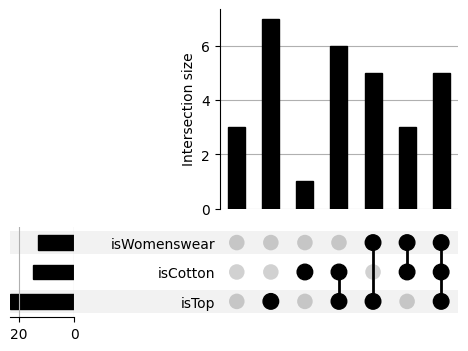

In [26]:
from upsetplot import plot
plot(prod_comb)